In [1]:
from google.colab import files
uploaded = files.upload()


Saving Chest CT-Scan images Dataset.zip to Chest CT-Scan images Dataset.zip


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file_path = '/content/Chest CT-Scan images Dataset.zip'

# Extracting the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/chest_ct_scan_dataset')

# List the files to confirm extraction
extracted_files = os.listdir('/content/chest_ct_scan_dataset')
print(extracted_files)


['Data']


In [4]:
data_dir = '/content/chest_ct_scan_dataset/Data'
subfolders = os.listdir(data_dir)
print(subfolders)


['valid', 'test', 'train']


In [14]:
train_dir = os.path.join(data_dir, 'train')
class_folders = os.listdir(train_dir)

for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
normal: 148 images
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


In [15]:
import os

# Assuming the dataset is already uploaded and extracted
data_dir = '/content/chest_ct_scan_dataset/Data'  # Adjust the path based on your setup

# List all files in the directory to check for any metadata files
files_in_dataset = os.listdir(data_dir)
print("Files and folders in the dataset:", files_in_dataset)


Files and folders in the dataset: ['valid', 'test', 'train']


In [16]:
import os
from datetime import datetime

#check the timestamps of images in the 'train' directory
train_dir = os.path.join(data_dir, 'train')

# Iterate through all the folders and files in the 'train' directory to get the timestamps
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        # Get a sample file from each class and check its timestamp
        sample_file = os.listdir(class_path)[0]  # Get the first file
        file_path = os.path.join(class_path, sample_file)

        # Get the file modification time
        timestamp = os.path.getmtime(file_path)
        mod_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        print(f"{sample_file} in {class_folder} was last modified on: {mod_time}")


000055.png in large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa was last modified on: 2024-10-14 23:05:18
10 - Copy.png in normal was last modified on: 2024-10-14 23:05:18
ad11.png in adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib was last modified on: 2024-10-14 23:05:18
000048.png in squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa was last modified on: 2024-10-14 23:05:18


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/content/chest_ct_scan_dataset/Data/train'
validation_dir = '/content/chest_ct_scan_dataset/Data/valid'

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values between 0 and 1
    rotation_range=20,    # Randomly rotate images
    width_shift_range=0.2, # Horizontal shifts
    height_shift_range=0.2, # Vertical shifts
    shear_range=0.2,      # Shearing transformations
    zoom_range=0.2,       # Zoom
    horizontal_flip=True, # Randomly flip images
    fill_mode='nearest')  # Fill missing pixels after augmentation

# Only rescale the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical')  # Since it's a multi-class problem

# Load the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),  # Resize validation images
    batch_size=32,
    class_mode='categorical')  # Multi-class problem


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import zipfile
import os

# Path to the actual ZIP file (make sure it's the ZIP file, not a directory)
zip_file_path = '/content/Chest_CT_Scan_Dataset.zip'  # Ensure this is the correct ZIP file path
extract_dir = '/content/chest_ct_scan_dataset/'  # Directory where the dataset will be extracted

# Unzipping the dataset
with zipfile.ZipFile('/content/Chest CT-Scan images Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


In [27]:
# Directory paths
data_dir = os.path.join(extract_dir, 'Data')
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')

# Check contents of the training directory
train_subfolders = os.listdir(train_dir)
print(f"Training classes: {train_subfolders}")

# Number of images per class
for class_folder in train_subfolders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


Training classes: ['large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
normal: 148 images
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to the range 0-1
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zooming
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Filling mode for shifted pixels
)

# Preprocessing for the validation set (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)

# Loading the validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [29]:
# Check class distribution in the training set
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    print(f"Class '{class_folder}' has {len(os.listdir(class_path))} images.")


Class 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' has 115 images.
Class 'normal' has 148 images.
Class 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' has 195 images.
Class 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' has 155 images.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2512 - loss: 2.3064 - val_accuracy: 0.1719 - val_loss: 1.3492
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1875 - loss: 1.3547 - val_accuracy: 0.2500 - val_loss: 1.2629
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2391 - loss: 1.3127 - val_accuracy: 0.4531 - val_loss: 1.2226
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 1.0867 - val_accuracy: 0.3750 - val_loss: 1.3018
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5199 - loss: 1.0902 - val_accuracy: 0.4844 - val_loss: 0.9941
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 1.0316 - val_accuracy: 0.1250 - val_loss: 1.1479
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5760 - loss: 1.0154 - val_accuracy: 0.5000 - val_loss: 1.0579
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 1.0741 - val_accuracy: 0.2500 - val_loss: 1.1261
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5921 - loss: 0.9995 - val_accuracy: 0.4688 - val_loss: 0.9844
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4688 - loss: 1.1733 - val_accuracy: 0.7500 - val_loss: 0.7555


In [31]:
# Evaluate model performance on the validation set
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.5139 - loss: 0.9429
Validation Accuracy: 52.78%


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizes pixel values to the range [0, 1]
    rotation_range=20,           # Randomly rotate images by 20 degrees
    width_shift_range=0.2,       # Horizontally shift images by 20%
    height_shift_range=0.2,      # Vertically shift images by 20%
    shear_range=0.2,             # Shearing transformations
    zoom_range=0.2,              # Random zooming
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)


In [39]:
from PIL import Image
import os

# Example directory (train_dir)
for subdir, _, files in os.walk(train_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(subdir, file))  # Try to open the image
            img.verify()  # Check for any issues
        except (IOError, SyntaxError) as e:
            print(f'Corrupted image: {file}')  # Flag corrupted images


In [40]:
import os

# Check if any classes are missing images
for subdir, dirs, files in os.walk(train_dir):
    print(f"Directory: {subdir}, contains {len(files)} images")


In [41]:
from PIL import Image
import os

def resize_image(image_path, size=(128, 128)):
    img = Image.open(image_path)
    img_resized = img.resize(size)
    return img_resized

# Resize all images in the train directory
for subdir, _, files in os.walk(train_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        img_resized = resize_image(img_path)
        img_resized.save(img_path)  # Save resized image


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling pixel values from [0, 255] to [0, 1]
datagen = ImageDataGenerator(rescale=1./255)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply augmentations during training to generate more samples for minority classes
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


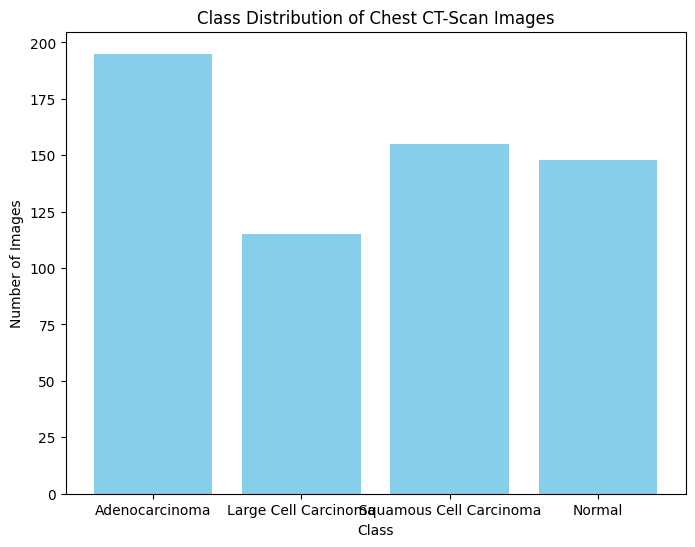

In [46]:
import matplotlib.pyplot as plt

# Data for class distribution (adjust based on your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Replace these numbers with actual counts from your dataset

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [48]:
import zipfile
import os

# Define the path to the ZIP file and extraction directory
zip_file_path = '/content/Chest CT-Scan images Dataset.zip'  # Update with your ZIP file path
extract_dir = '/content/chest_ct_scan_dataset/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


Adenocarcinoma Samples


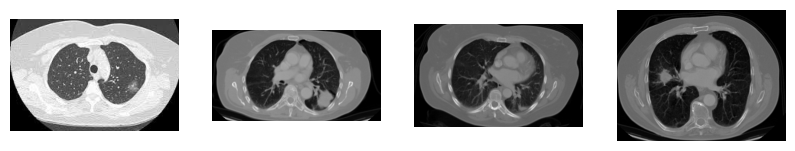

Normal Case Samples


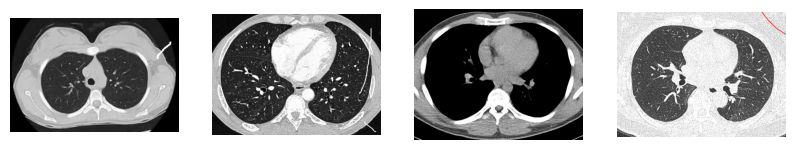

In [49]:
# After extracting, update these paths to point to the correct directories
adenocarcinoma_dir = os.path.join(extract_dir, 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')
normal_dir = os.path.join(extract_dir, 'Data/train/normal')

# Display sample images from adenocarcinoma
print("Adenocarcinoma Samples")
plot_sample_images(adenocarcinoma_dir)

# Display sample images from normal cases
print("Normal Case Samples")
plot_sample_images(normal_dir)


In [51]:
import os

# Check contents of the train directory to ensure there are images
for root, dirs, files in os.walk(train_dir):
    print(f"Directory: {root}")
    print(f"Number of images: {len(files)}")


In [52]:
from PIL import Image
import os

def get_image_dimensions(image_dir):
    dimensions = []
    for subdir, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Add supported image formats
                img_path = os.path.join(subdir, file)
                try:
                    img = Image.open(img_path)
                    dimensions.append(img.size)  # Append (width, height)
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
    return dimensions

# Now get dimensions of training images
train_dimensions = get_image_dimensions(train_dir)

# Check if train_dimensions is populated correctly
print(f"Number of images processed: {len(train_dimensions)}")
if len(train_dimensions) == 0:
    print("No images found or processed. Please check your directory paths.")


Number of images processed: 0
No images found or processed. Please check your directory paths.


In [53]:
# Separate width and height for plotting
if train_dimensions:
    widths, heights = zip(*train_dimensions)

    # Plot the distributions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='orange')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No dimensions to plot. Check if images were processed correctly.")


No dimensions to plot. Check if images were processed correctly.


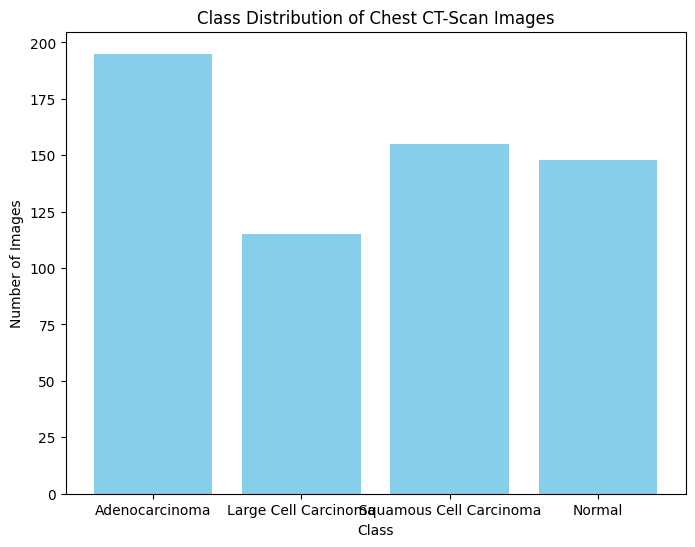

In [58]:
import matplotlib.pyplot as plt

# Data for class distribution (replace with actual counts from your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Example numbers; replace with your actual counts

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


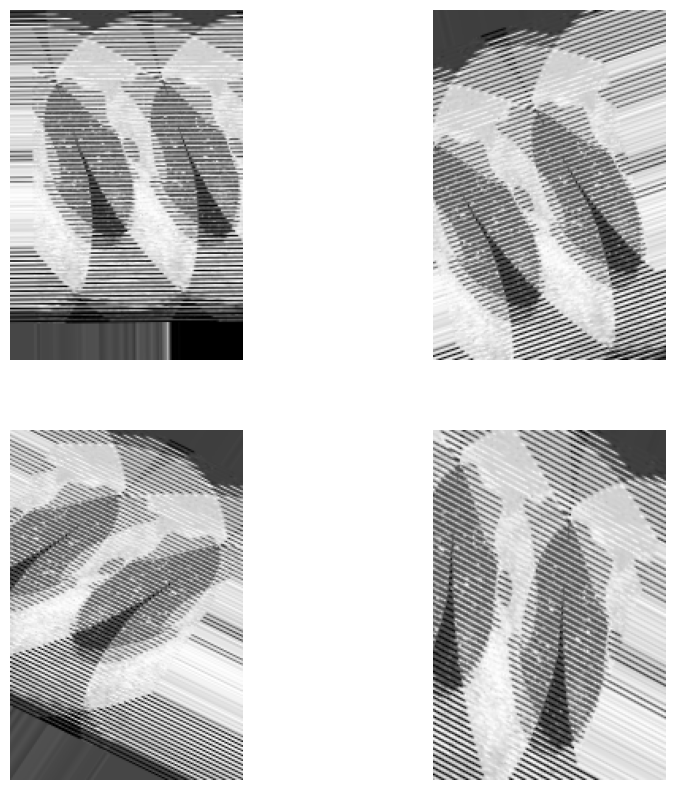

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Sample image path (replace with actual path)
img_path = os.path.join(adenocarcinoma_dir, os.listdir(adenocarcinoma_dir)[0])
img = Image.open(img_path).convert('RGB')
img_array = np.array(img).reshape((1,) + img.size + (3,))

# Create ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and display them
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(img_array, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i == 4:
        break
plt.show()
